In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=51
letter=np.zeros((N,N))
L=30

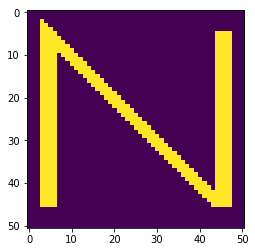

In [3]:
for i in range(5,N-5):
    for j in range(3,7):
        letter[i,j]=1
    
for i in range(5,N-5):
    for j in range(44,48):
        letter[i,j]=1
a=3
for i in range(5,N-5):
    if a<48:
        letter[i,a]=1
        letter[i-1,a]=1
        letter[i-2,a]=1
        letter[i-3,a]=1
        a=a+1
    
plt.imshow(letter,interpolation='nearest')
plt.show()    

In [4]:
T=np.zeros((N+1,N+1))
Tnew=np.zeros((N+1,N+1))

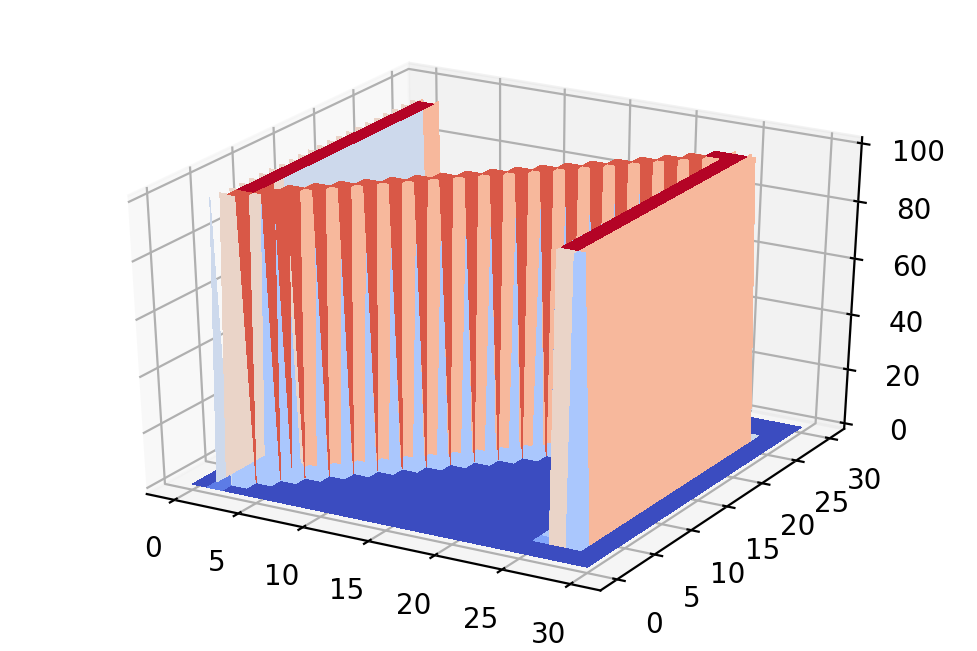

In [5]:
for i in range(0,N):
    for j in range(0,N):
        if letter[i,j]==1:
            T[i,j]=100 
            
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm            
X = np.linspace(0, L, N+1) # where n is number of segments
Y = np.linspace(0, L, N+1)
X, Y = np.meshgrid(X, Y)
fig = plt.figure(dpi=200)    
fig.clear()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
plt.draw()
plt.show()
#plt.pause(0.5)

Done


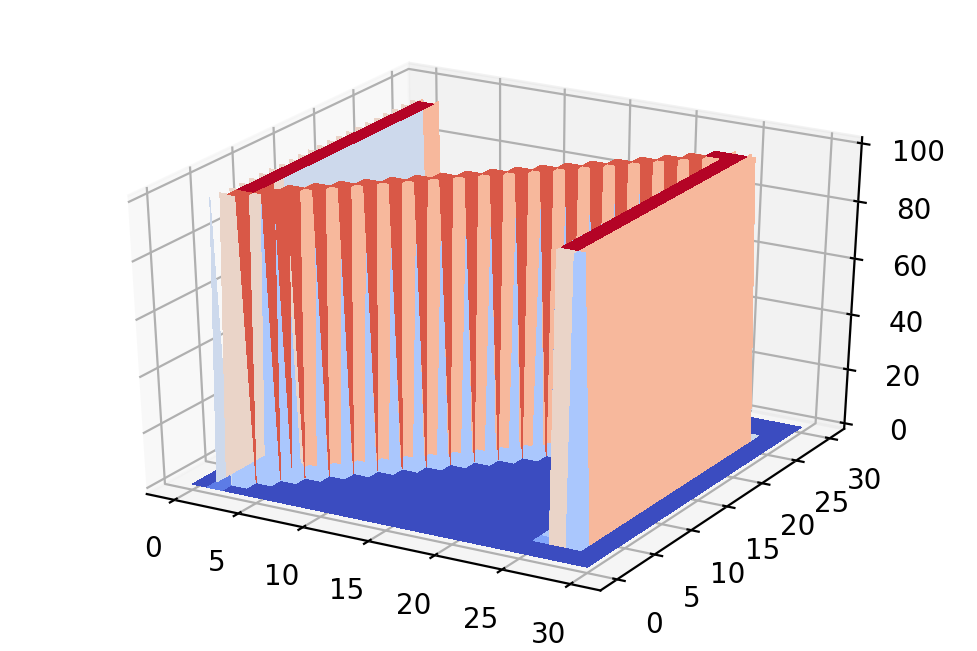

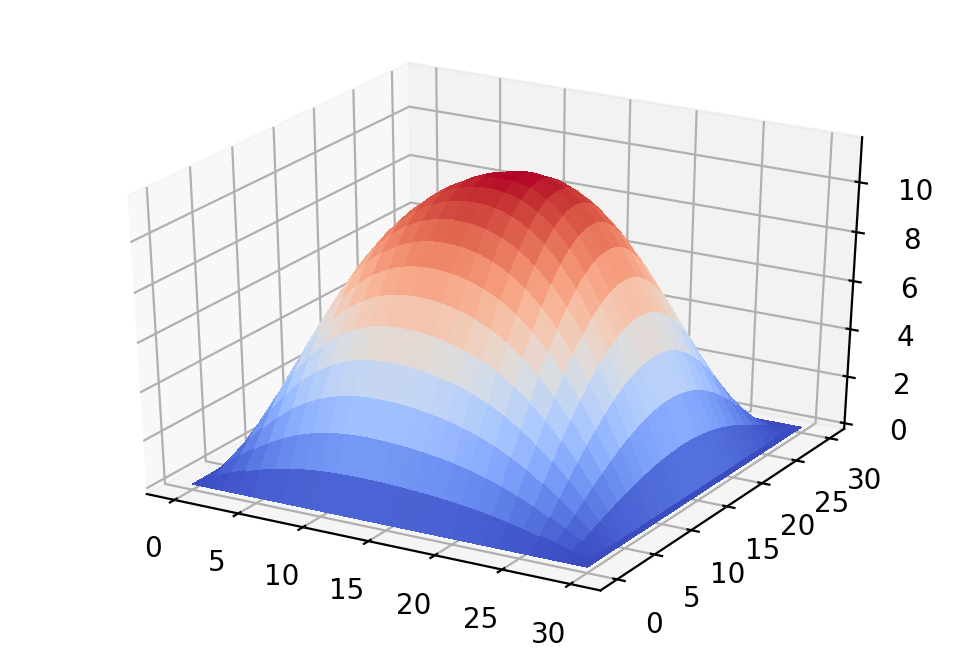

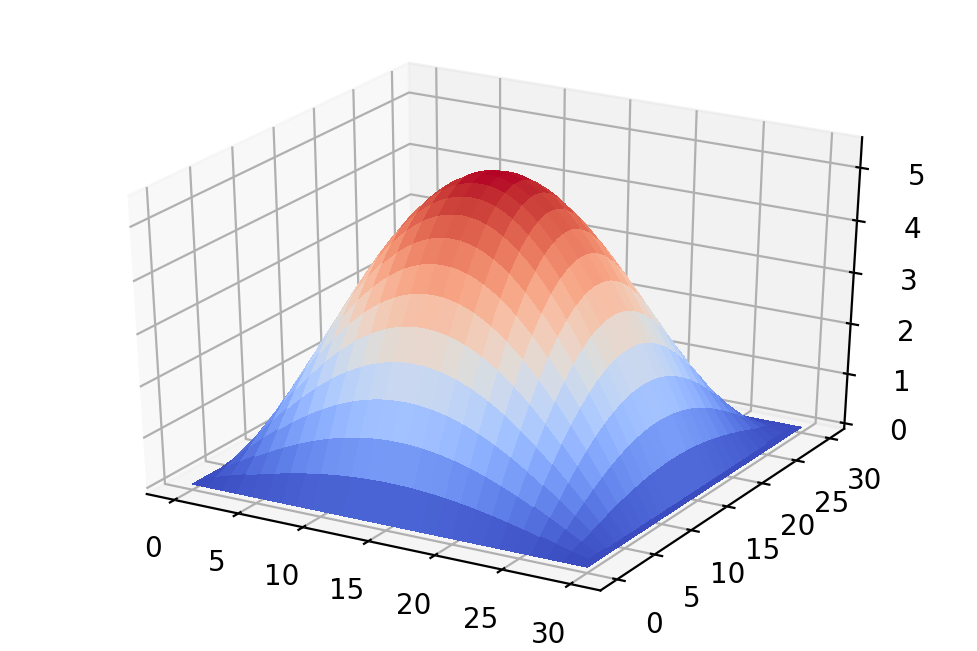

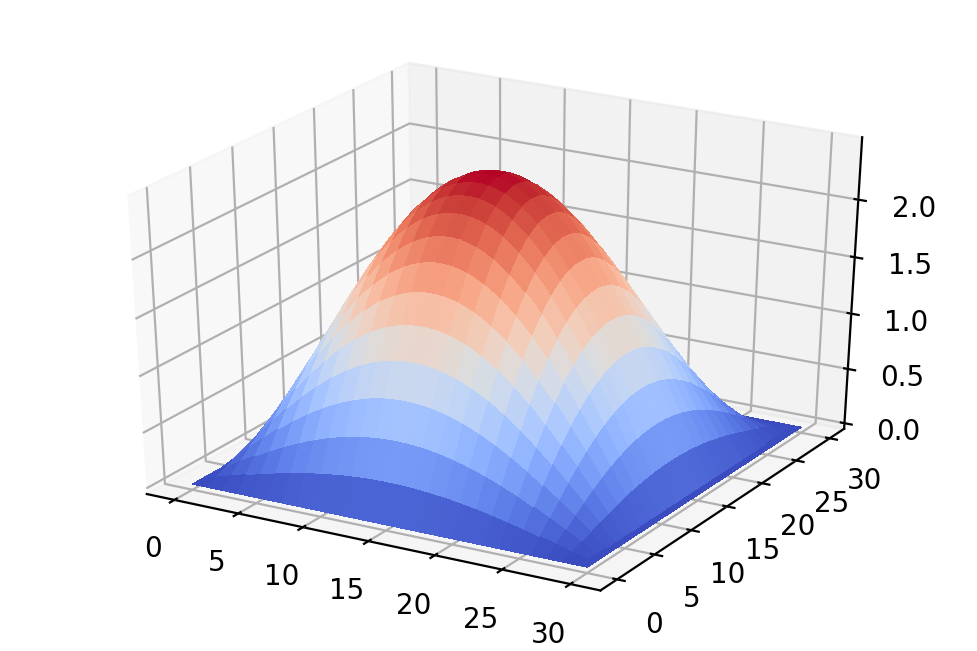

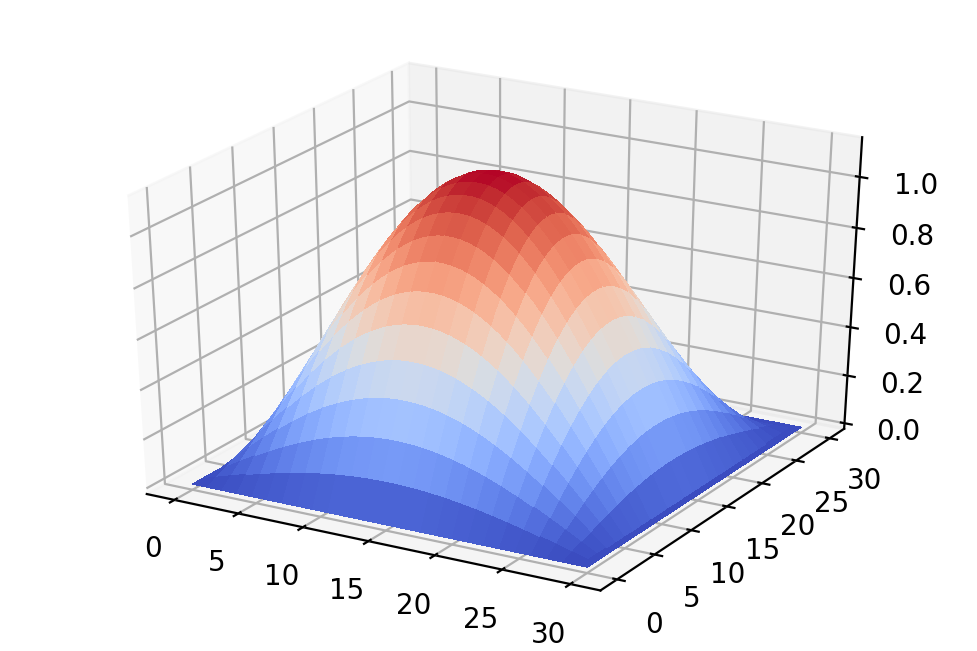

In [6]:
for k in range(0,800): 
    if k==0 or k==200 or k==400 or k==600 or k==800-1:
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib import cm
        X = np.linspace(0, L, N+1) # where n is number of segments
        Y = np.linspace(0, L, N+1)
        X, Y = np.meshgrid(X, Y)
        fig = plt.figure(dpi=200)
        fig.clear()
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
        plt.draw()
        #plt.pause(0.05)
    
    for i in range(1,N-1):
        Tnew=np.copy(T)
        Tnew[i,j]=(1/4)*(Tnew[i-1,j]+Tnew[i+1,j]+Tnew[i,j-1]+Tnew[i,j+1])
        T=np.copy(Tnew)
        
        for j in range(1,N-1):
            Tnew=np.copy(T)
            Tnew[i,j]=(1/4)*(Tnew[i,j-1]+Tnew[i,j+1]+Tnew[i-1,j]+Tnew[i+1,j])
            T=np.copy(Tnew)
print('Done')
plt.show()

In [7]:
TotalT=0
for i in range (0,N-1):
    for j in range(0,N-1):
        TotalT=TotalT+T[i,j]
print(TotalT)

1139.66792542


Total original temperature is 48200.0
New total temperature is 48200.0 . Which is 100.0 % of the original.
New total temperature is 47264.7533523 . Which is 98.0596542578 % of the original.
New total temperature is 47513.1343693 . Which is 98.5749675712 % of the original.
New total temperature is 47599.8450004 . Which is 98.754865146 % of the original.
New total temperature is 47628.3490703 . Which is 98.8140022206 % of the original.


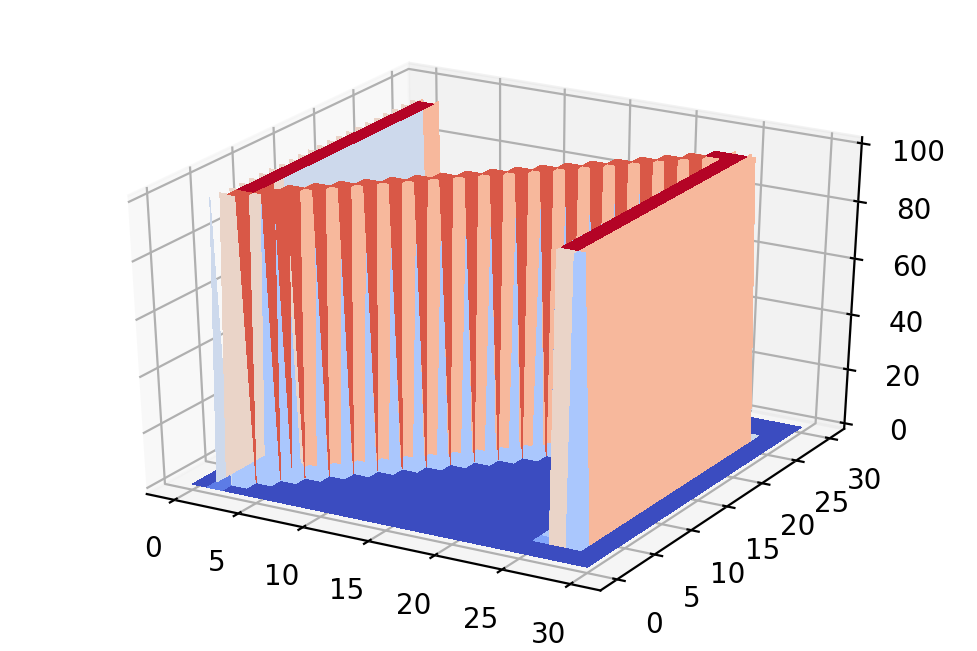

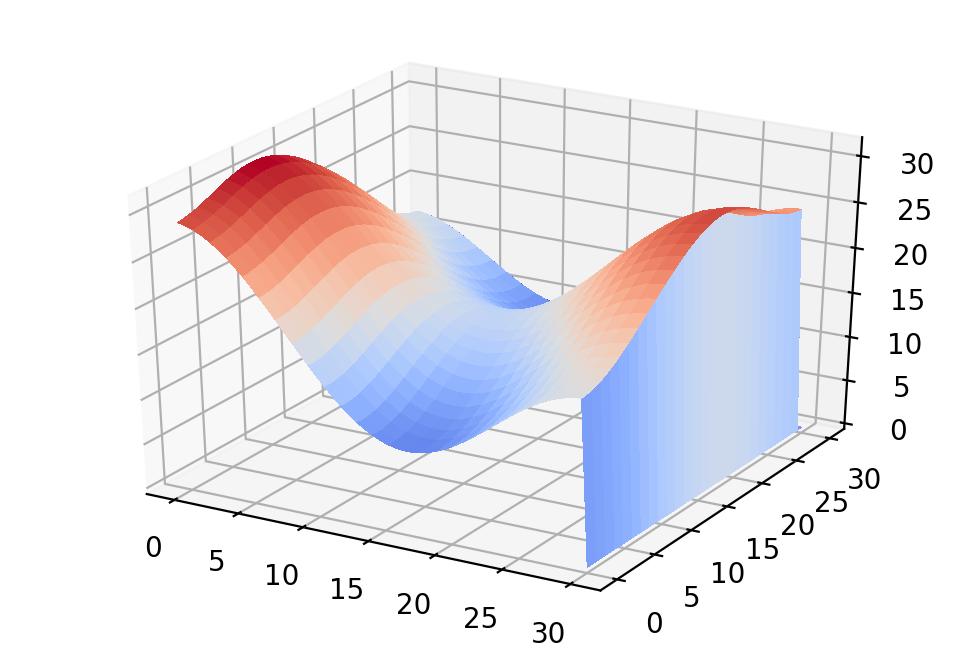

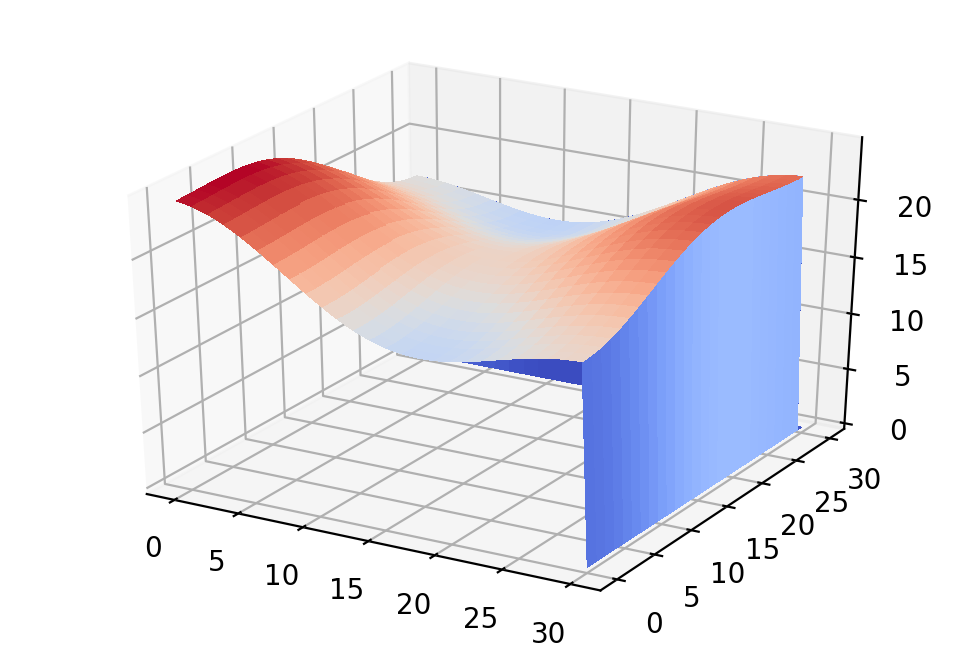

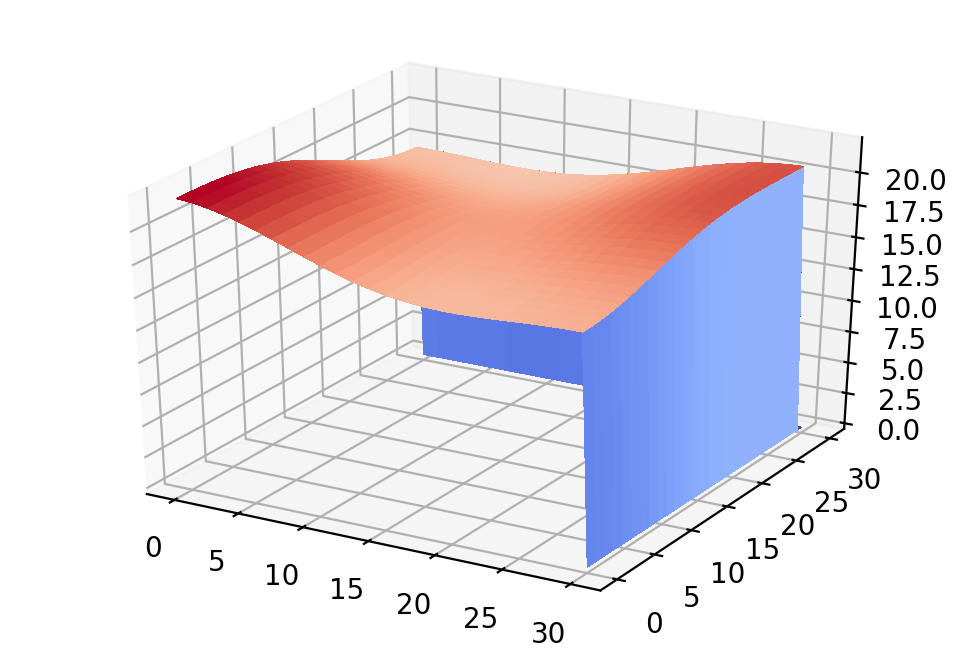

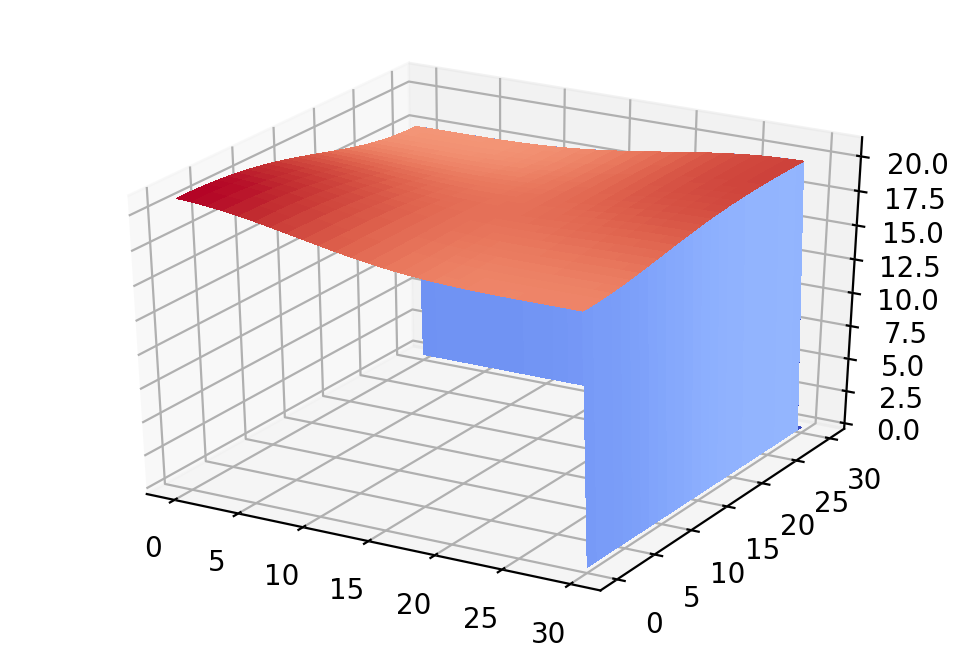

In [8]:
T=np.zeros((N+1,N+1))
Tnew=np.zeros((N+1,N+1))
for i in range(0,N):
    for j in range(0,N):
        if letter[i,j]==1:
            T[i,j]=100 


for k in range(0,500):
    if k==0:
        TotalT=0
        for i in range (0,N-1):
            for j in range(0,N-1):
                TotalT=TotalT+T[i,j]
        print('Total original temperature is',TotalT)
        
    Tnew=np.copy(T)
    Tnew[0,0] = ( 2.0*Tnew[0,0] + Tnew[1,0] + Tnew[0,1] )/4.0
    Tnew[0,N-1] = ( 2.0*Tnew[0,N-1] + Tnew[1,N-1] + Tnew[0,N-2] )/4.0
    Tnew[N-1,0] = ( 2.0*Tnew[N-1,0] + Tnew[N-2,0] + Tnew[N-1,1] )/4.0
    Tnew[N-1,N-1] = ( 2.0*Tnew[N-1,N-1] + Tnew[N-2,N-1] + Tnew[N-1,N-2] )/4.0
    T=np.copy(Tnew)
    
    if k==0 or k==125 or k==250 or k==375 or k==500-1:
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib import cm
        X = np.linspace(0, L, N+1) # where n is number of segments
        Y = np.linspace(0, L, N+1)
        X, Y = np.meshgrid(X, Y)
        fig = plt.figure(dpi=200)
        fig.clear()
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
        plt.draw()
        #plt.pause(0.05)
        newTotalT=0
        
        for i in range (0,N-1):
            for j in range(0,N-1):
                newTotalT=newTotalT+T[i,j]
        print('New total temperature is',newTotalT,'. Which is',(newTotalT/TotalT)*100,'% of the original.')

    for i in range(1,N-1):
        Tnew=np.copy(T)
        Tnew[i,j]=(1/4)*(Tnew[i-1,j]+Tnew[i+1,j]+Tnew[i,j-1]+Tnew[i,j+1])
        Tnew[i,0] = ( Tnew[i,0] + Tnew[i+1,0] + Tnew[i-1,0] + Tnew[i,1] )/4.0   #top right?
        Tnew[i,N-1] = ( Tnew[i,N-1] + Tnew[i+1,N-1] + Tnew[i-1,N-1] + Tnew[i,N-2] )/4.0
        T=np.copy(Tnew)
        
        for j in range(1,N-1):
            Tnew=np.copy(T)
            Tnew[i,j]=(1/4)*(Tnew[i,j-1]+Tnew[i,j+1]+Tnew[i-1,j]+Tnew[i+1,j])
            Tnew[0,j] = ( Tnew[0,j] + Tnew[0,j+1] + Tnew[0,j-1] + Tnew[1,j] )/4.0
            Tnew[N-1,j] = ( Tnew[N-1,j] + Tnew[N-1,j+1] + Tnew[N-1,j-1] + Tnew[N-2,j] )/4.0
            T=np.copy(Tnew)

plt.show()